In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 12.7MB/s 
     |████████████████████████████████| 9.5MB 67.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Telangana1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,19,0,0,0,17,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,17,0,0,0,0,0,0,0
131397,2014,12,31,21,0,18,0,0,0,17,0,0,0,0,0,0,0
131398,2014,12,31,22,0,17,0,0,0,16,0,0,0,0,0,0,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,14,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,15,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,19,62,205,94,16,69,69,147,147,0,92,92,2000-01-01 02:00:00
3,2000,1,1,3,0,23,131,463,297,17,131,138,463,460,0,297,303,2000-01-01 03:00:00
4,2000,1,1,4,0,25,170,605,490,17,170,166,605,624,0,490,496,2000-01-01 04:00:00
5,2000,1,1,5,0,28,193,682,640,17,193,191,682,691,0,640,644,2000-01-01 05:00:00
6,2000,1,1,6,0,29,205,720,729,17,205,239,720,679,0,729,734,2000-01-01 06:00:00
7,2000,1,1,7,0,29,207,727,748,17,295,295,518,518,0,681,681,2000-01-01 07:00:00
8,2000,1,1,8,0,29,200,706,694,17,200,210,706,696,0,694,698,2000-01-01 08:00:00
9,2000,1,1,9,0,29,184,651,574,17,184,173,651,686,0,574,585,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [8]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,186.7
2000-01-02,187.8
2000-01-03,190.3
2000-01-04,192.8
2000-01-05,192.2
...,...
2014-12-27,184.9
2014-12-28,186.4
2014-12-29,185.7


In [9]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,191.571429
2000-01-14,195.457143
2000-01-21,203.457143
2000-01-28,212.814286
2000-02-04,236.842857
...,...
2014-12-05,175.114286
2014-12-12,155.771429
2014-12-19,149.800000


In [10]:
y_w[:'2011']

,GHI
Date,
2000-01-07,191.571429
2000-01-14,195.457143
2000-01-21,203.457143
2000-01-28,212.814286
2000-02-04,236.842857
...,...
2011-12-02,157.442857
2011-12-09,173.671429
2011-12-16,175.271429


In [11]:
y[:4382]

,GHI
Date,
2000-01-01,186.7
2000-01-02,187.8
2000-01-03,190.3
2000-01-04,192.8
2000-01-05,192.2
...,...
2011-12-29,180.3
2011-12-30,176.4
2011-12-31,53.5


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
type(y)

pandas.core.frame.DataFrame

In [14]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [15]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [16]:
type(X_T[:626])

numpy.ndarray

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=7))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[176.97644]]
[[195.4378]]
[[211.07784]]
[[216.18768]]
[[225.5359]]
[[231.37683]]
[[244.96358]]
[[261.06766]]
[[261.45508]]
[[264.15277]]
[[271.65857]]
[[275.89847]]
[[274.3643]]
[[242.45221]]
[[237.05573]]
[[260.87222]]
[[245.94772]]
[[257.40607]]
[[259.5514]]
[[268.21237]]
[[250.31133]]
[[259.91376]]
[[262.31964]]
[[183.58363]]
[[164.49998]]
[[222.53227]]
[[192.57265]]
[[237.25426]]
[[162.61635]]
[[110.866554]]
[[146.88417]]
[[229.56331]]
[[192.42873]]
[[225.76329]]
[[176.83852]]
[[204.99918]]
[[245.32225]]
[[183.00307]]
[[214.26718]]
[[175.64658]]
[[217.4974]]
[[171.50262]]
[[189.99341]]
[[119.16743]]
[[175.81335]]
[[170.66862]]
[[153.12213]]
[[160.07123]]
[[164.11485]]
[[173.1166]]
[[181.01262]]
[[183.85675]]
[[171.31924]]
[[191.64066]]
[[197.88605]]
[[185.58223]]
[[214.54619]]
[[227.04422]]
[[219.06535]]
[[247.9123]]
[[256.62885]]
[[256.8816]]
[[249.50223]]
[[225.8836]]
[[271.07468]]
[[270.81757]]
[[271.44373]]
[[254.45512]]
[[270.18686]]
[[270.33008]]
[[281.1035]]
[[225.93227]]
[

[array([[176.97644]], dtype=float32),
 array([[195.4378]], dtype=float32),
 array([[211.07784]], dtype=float32),
 array([[216.18768]], dtype=float32),
 array([[225.5359]], dtype=float32),
 array([[231.37683]], dtype=float32),
 array([[244.96358]], dtype=float32),
 array([[261.06766]], dtype=float32),
 array([[261.45508]], dtype=float32),
 array([[264.15277]], dtype=float32),
 array([[271.65857]], dtype=float32),
 array([[275.89847]], dtype=float32),
 array([[274.3643]], dtype=float32),
 array([[242.45221]], dtype=float32),
 array([[237.05573]], dtype=float32),
 array([[260.87222]], dtype=float32),
 array([[245.94772]], dtype=float32),
 array([[257.40607]], dtype=float32),
 array([[259.5514]], dtype=float32),
 array([[268.21237]], dtype=float32),
 array([[250.31133]], dtype=float32),
 array([[259.91376]], dtype=float32),
 array([[262.31964]], dtype=float32),
 array([[183.58363]], dtype=float32),
 array([[164.49998]], dtype=float32),
 array([[222.53227]], dtype=float32),
 array([[192.572

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

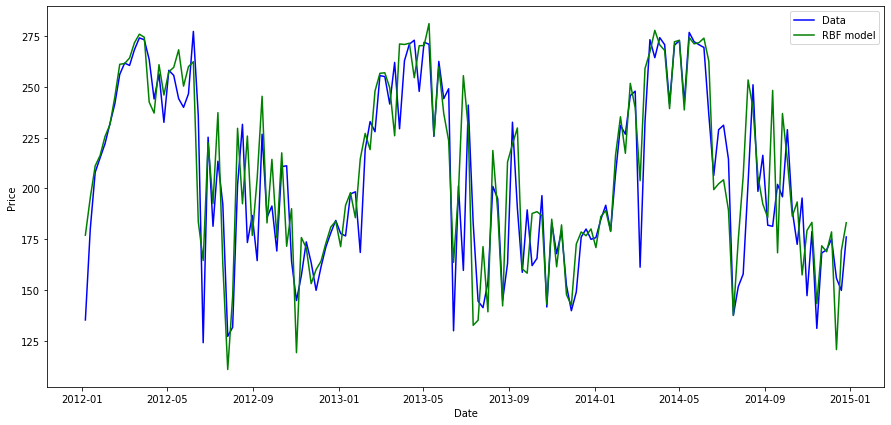

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))

22.01922853543483


In [22]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))

0.08160112944038742


In [23]:
X_train = y_w[:'2011']
X_test = y_w['2012':]

In [24]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, m=52,start_P=0,start_Q=0,max_P=1,max_D=1,max_Q=1, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=5977.403, Time=0.33 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=5731.108, Time=4.42 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=19.91 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=5871.016, Time=0.44 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=39.67 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=25.91 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=5854.909, Time=3.78 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=inf, Time=35.59 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=inf, Time=13.54 sec
 ARIMA(1,1,0)(1,1,0)[52] intercept   : AIC=5733.105, Time=15.10 sec

Best model:  ARIMA(1,1,0)(1,1,0)[52]          
Total fit time: 158.708 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  626
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -2862.554
Date:                            Sun, 02 May 2021   AIC                           5731.108
Time:                                    12:20:59   BIC                           5744.161
Sample:                                         0   HQIC                          5736.200
                                            - 626                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4443      0.031    -14.516      0.000      -0.504      -0.384
ar.S.L52      -0.5016      0.029    -17.562      0.000      -0.558      -0.446
sigma2      1245.2700     55.668     22.370      0.000    1136.163    1354.377
===================================================================================
Ljung-Box (L1) (Q):                   8.08   Jarque-Bera (JB):                63.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             0.08
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
stepwise_model.fit(X_train)
pred=stepwise_model.predict(n_periods=156)
pred

array([202.30597614, 186.22014089, 221.37275676, 228.05135187,
       237.51209262, 243.03231293, 246.50007394, 246.81435834,
       263.40132302, 270.51464637, 274.06668146, 282.92842508,
       285.60943582, 281.81943506, 280.1692977 , 275.05342007,
       285.83571817, 268.87243807, 270.26908949, 232.24204414,
       268.6704823 , 261.64227637, 248.19547964, 236.06761532,
       213.78634569, 195.00979991, 192.78817411, 193.23533644,
       205.61487135, 210.11147038, 207.04772444, 226.80578447,
       199.27994632, 208.13216293, 179.13344509, 179.60118867,
       200.72065605, 197.43437328, 216.82705057, 204.58620115,
       213.43930546, 181.37095756, 200.18851621, 169.94762015,
       176.10590613, 180.31658868, 181.50638793, 172.00421785,
       155.29037852, 189.08035222, 192.96979749, 193.18477951,
       209.18948113, 207.66515504, 228.83904472, 236.99025475,
       244.87265593, 252.13841969, 255.1135618 , 255.28452552,
       270.14384079, 279.80876679, 286.2799534 , 291.14

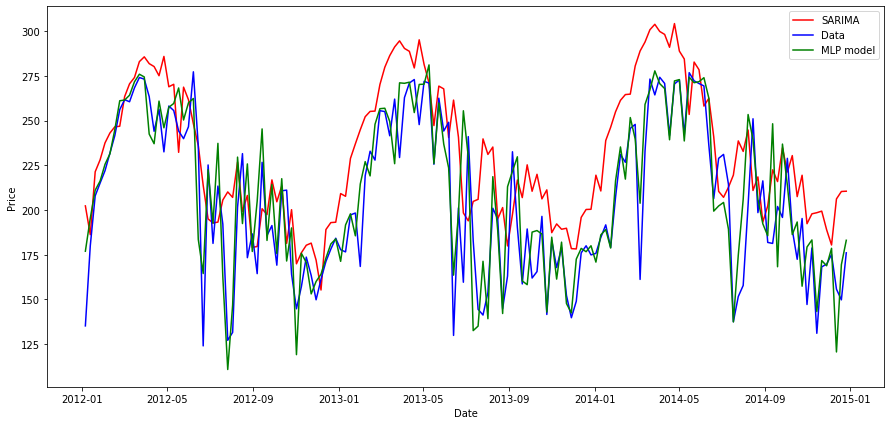

In [26]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, pred, color= 'red', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'MLP model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

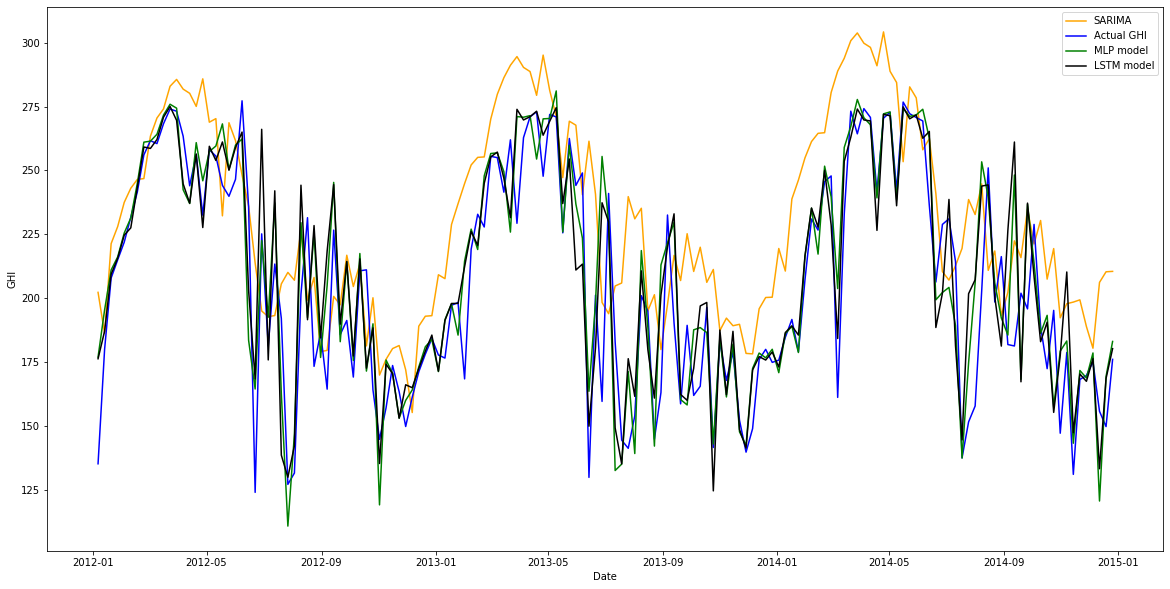

In [28]:
LSTM = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Telangana1/LSTMweekly.csv')
plt.figure(figsize = (20,10))
plt.plot(y_w[626:-1].index, pred, color= 'orange', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Actual GHI')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'MLP model') 
plt.plot(y_w[626:-1].index, LSTM['GHI'], color= 'black', label= 'LSTM model')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

In [ ]:
hybrid=pd.DataFrame(columns=['Values','Model'])
for i in range (156):
  if abs(yhat[i]-y_w.iloc[626+i]['GHI'])<abs(pred[i]-y_w.iloc[626+i]['GHI']):
    hybrid.loc[i]=[yhat[i][0][0],-1]
  else:
    hybrid.loc[i]=[pred[i],1]
hybrid

,Values,Model
0,178.384781,-1.0
1,182.012939,-1.0
2,207.718933,-1.0
3,213.160294,-1.0
4,222.758759,-1.0
...,...,...
151,166.716995,-1.0
152,175.982239,-1.0
153,151.201630,-1.0
154,166.912201,-1.0


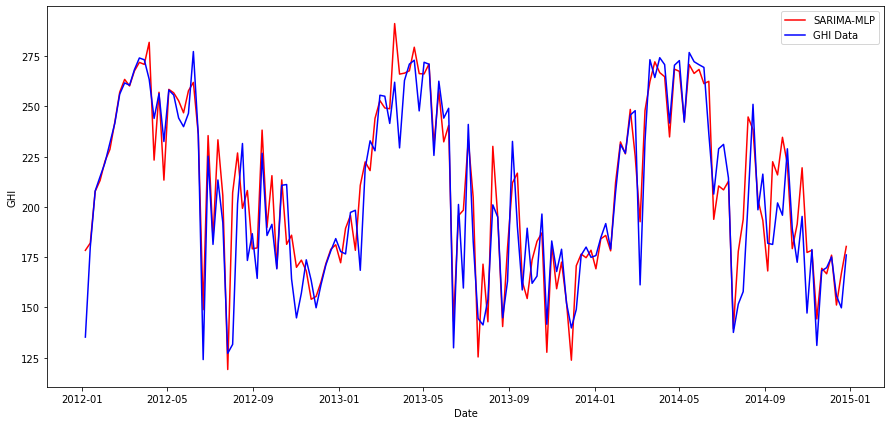

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, hybrid['Values'], color= 'red', label= 'SARIMA-MLP')
#plt.scatter(y_w[626:678].index, hybrid['Model'][:52], color= 'red', label= 'hybrid1',marker='+')
#plt.scatter(y_w[626:678].index, hybrid['Model'][52:104], color= 'blue', label= 'hybrid2',marker='|',s=hybrid['Model'][52:104]*50)
#plt.scatter(y_w[626:678].index, hybrid['Model'][104:156], color= 'green', label= 'hybrid3',marker='_')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'GHI Data')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))
print(mean_squared_error(y_w[626:-1],pred,squared=False))
print(mean_squared_error(y_w[626:-1],hybrid['Values'],squared=False))

22.2484724827055
38.84779218956139
17.195305943579953


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))
print(mean_absolute_percentage_error(y_w[626:-1],pred))
print(mean_absolute_percentage_error(y_w[626:-1],hybrid['Values']))

0.08112611432686054
0.1724979111666919
0.06590291616417822
